In [1]:
from numpy import save
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

def datos(file):
    data = mne.io.read_raw_edf(f'{file}.edf')
    raw_data = data.get_data()
    events, events_id = mne.events_from_annotations(data)
    tmax = 30. - 1. / data.info['sfreq']  # tmax in included

    epochs_train = mne.Epochs(raw=data, events=events,
                              event_id=events_id, tmin=0., tmax=tmax, baseline=None, event_repeated='merge')
    patatuela = epochs_train.load_data()
    id_to_class_dict = {value:key for key, value in patatuela.event_id.items()}

    objective_stages = ['Sleep stage N1','Sleep stage N2','Sleep stage N3','Sleep stage R','Sleep stage W']
    epochs_to_df = [a for a in patatuela]
    epochs_to_df = []
    label_to_df = []
    for epoch, label in zip(patatuela, patatuela.events[:,-1]):
        # print(label)
        label = id_to_class_dict[label]
        if label in objective_stages:
            # print("True")
            epochs_to_df.append(epoch)
            label_to_df.append(label)
    dict_to_df = {"Epoch":epochs_to_df,"Label":label_to_df}
    df1=pd.DataFrame(dict_to_df)
    valores=df1.Epoch.values
    channels = data.ch_names
    diccionarios=[dict(zip(channels, sublist)) for sublist in valores]
    c3=[d['C3'] for d in diccionarios]
    c4=[d['C4'] for d in diccionarios]
    o1=[d['O1'] for d in diccionarios]
    o2=[d['O2'] for d in diccionarios]
    loc=[d['LOC'] for d in diccionarios]
    roc=[d['ROC'] for d in diccionarios]
    chin=[d['CHIN1'] for d in diccionarios]
#     sc=StandardScaler()
#     c3_sc=(c3-np.mean(c3))/np.std(c3)
#     c4_sc=(c4-np.mean(c4))/np.std(c4)
#     o1_sc=(o1-np.mean(o1))/np.std(o1)
#     o2_sc=(o2-np.mean(o2))/np.std(o2)
#     loc_sc=(loc-np.mean(loc))/np.std(loc)
#     roc_sc=(roc-np.mean(roc))/np.std(roc)
#     chin_sc=(chin-np.mean(chin))/np.std(chin)
    matriz=np.array([c3,c4,o1,o2,loc,roc,chin])
    
    matriz=np.transpose(matriz,axes=(1,2,0))

    name=file
    save(f'datos_{name}.npy', matriz)
    df1.Label.to_csv(f'Etiquetas_{name}.csv',index=None)

    return matriz, df1.Label

In [119]:
X_psg1,y_psg1=datos('PSG1')
X_psg2,y_psg2=datos('PSG2')
X_psg3,y_psg3=datos('PSG3')
X_psg4,y_psg4=datos('PSG4')
X_psg5,y_psg5=datos('PSG5')
X_psg6,y_psg6=datos('PSG6')
X_psg7,y_psg7=datos('PSG7')
X_psg8,y_psg8=datos('PSG8')
X_psg9,y_psg9=datos('PSG9')
X_psg11,y_psg11=datos('PSG11')
X_psg12,y_psg12=datos('PSG12')
X_psg13,y_psg13=datos('PSG13')
X_psg14,y_psg14=datos('PSG14')

Extracting EDF parameters from /home/pabloro/master/PSG1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 3 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PR, Ref', 'Obstructive Apnea', 'Oximeter Event', 'Oxygen Desaturation', 'Pulse Rate Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
3031 matching events found
No baseline correction applied
0 projection items activated
Loading data for 3031 events and 15360 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/pabloro/master/PSG2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 6 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Central Apnea', 'Central Hypopnea', 'EEG arousal', 'ENTRO A COLOCAR PULSIOXIMETRO', 'ENTRO PARA ARREGLAR CHIN', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Mixed Apnea', 'Mixed Hypopnea', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oximeter Event', 'Oxygen Desaturation', 'Pulse Rate Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage ?', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - ECG', 'Started Analyzer - Sleep Events', 'Tachycardia', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1287 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1287

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 2 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Bradycardia', 'Central Apnea', 'EEG arousal', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Lights On', 'Limb Movement', 'Mixed Apnea', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oximeter Event', 'Oxygen Desaturation', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'Stopped Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1724 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1724 events and 15360 original time points ...
3 bad epochs dropped
Extracting EDF parameters from /home/pabloro/maste

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 39 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Gain/Filter Change', 'Headbox Disconnecting', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PR, Ref', 'NO ENTRO POR EKG', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Pulse Rate Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON', 'Video System Error']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1990 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1990 events and 15360 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/pabloro/master/PSG5.edf...
EDF file de

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 143 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Central Apnea', 'EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PSG CO2, Ref', 'ORINANDO', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1525 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1525 events and 15360 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 234 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 3 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Central Apnea', 'EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Mixed Apnea', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Tachycardia', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
2767 matching events found
No baseline correction applied
0 projection items activated
Loading data for 2767 events and 15360 original time points ...
6 bad epochs dropped
Extracting EDF paramete

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 113 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Bradycardia', 'EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
2698 matching events found
No baseline correction applied
0 projection items activated
Loading data for 2698 events and 15360 original time points ...
7 bad epochs dropped
Extracting EDF parameters from /home/pabloro/master/PSG8.edf...
EDF file detected
Setting channel info struct

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 4 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Bradycardia', 'CAMBIO A2', 'Central Apnea', 'Central Hypopnea', 'EEG arousal', 'ENTRO A REVISAR FLOW', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Mixed Apnea', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'REVISOMA2', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'TIENE FRIO LE PONGO UNA MANTA', 'Tachycardia']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1005 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1005 events and 15360 original time points ...
1 

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 99 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PSG CO2, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Tachycardia', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1429 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1429 events and 15360 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/pabloro/maste

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 92 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Bradycardia', 'Central Apnea', 'EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Tachycardia', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
3903 matching events found
No baseline correction applied
0 projection items activated
Loading data for 3903 events and 15360 original time points ...
2 bad epochs dropped
Extracting EDF paramete

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 120 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PSG CO2, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Tachycardia', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1143 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1143 events and 15360 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/pabloro/master/PSG13.edf...
ED

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 2 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['AHORA QUE ESTA MÃ\x81S TRANQUILO Y FINALIZANDO ', 'Bradycardia', 'CON LOS MOVIMIENTOS SE HABIA DOBLADO CANULA', 'CUANDO SE DESPIERTE REVISARE CHIN', 'CUANDO SE MUEVA REVISO BANDA ABD.', 'Central Apnea', 'EEG arousal', 'EKG CORRECTO', 'ENTRO A REVISAR FLOW', 'ESTA TODO DOBLADO A LA PART IZQ. POR ESO MALA SEÃ\x91AL EKG', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Lights On', 'Limb Movement', 'Montage:PR, Ref', 'NO VOY A ENTRAR POR ekg', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'REVISO MONTAJE', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'SE MUEVE MUCHO ESTA TODO SUDADO', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events']
Not setting metadata
Multiple event values for single event ti

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 104 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PSG CO2, Ref', 'Obstructive Apnea', 'Oxygen Desaturation', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
2003 matching events found
No baseline correction applied
0 projection items activated
Loading data for 2003 events and 15360 original time points ...
4 bad epochs dropped


In [10]:
import tensorflow

X_juntados=tensorflow.concat([X_psg1,X_psg2],axis=0).numpy()
y_juntados=tensorflow.concat([y_psg2,y_psg2],axis=0).numpy()

In [48]:
y_todos=np.concatenate([y_psg1,y_psg2])

In [25]:
X2=np.transpose(X_juntados,axes=(2,1,0))

In [43]:
X2_sc=np.array([(x-np.mean(x))/(np.std(x)) for x in X2])

In [46]:
from sklearn.preprocessing import Normalizer

norm=Normalizer()

X2_sc=np.transpose(np.array([(norm.fit_transform(x)) for x in X2]),axes=(2,1,0))

In [49]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y_todos_bin=le.fit_transform(y_todos)

In [53]:
from collections import Counter

Counter(y_todos_bin), Counter(y_todos)

(Counter({4: 264, 0: 88, 1: 705, 2: 428, 3: 237}),
 Counter({'Sleep stage W': 264,
          'Sleep stage N1': 88,
          'Sleep stage N2': 705,
          'Sleep stage N3': 428,
          'Sleep stage R': 237}))

In [59]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X2_sc,y_todos_bin,train_size=0.7,shuffle=True)

In [55]:
X_train.shape,y_train.shape

((1205, 15360, 7), (1205,))

In [56]:
from matplotlib.ticker import MaxNLocator
from IPython.display import SVG, display, clear_output
import matplotlib.pyplot as plt

def grafica_entrenamiento(tr_acc, val_acc, tr_loss, val_loss, best_i,
                          figsize=(10,4)):
    plt.figure(figsize=figsize)
    ax = plt.subplot(1,2,1)
    plt.plot(1+np.arange(len(tr_acc)),  100*np.array(tr_acc))
    plt.plot(1+np.arange(len(val_acc)), 100*np.array(val_acc))
    plt.plot(1+best_i, 100*val_acc[best_i], 'or')
    plt.title('tasa de acierto del modelo (%)', fontsize=18)
    plt.ylabel('tasa de acierto (%)', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.subplot(1,2,2)
    plt.plot(1+np.arange(len(tr_acc)), np.array(tr_loss))
    plt.plot(1+np.arange(len(val_acc)), np.array(val_loss))
    plt.plot(1+best_i, val_loss[best_i], 'or')
    plt.title('loss del modelo', fontsize=18)
    plt.ylabel('loss', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

In [76]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling1D,BatchNormalization, UpSampling1D,Input,Dense,LSTM,MaxPooling1D, Dropout,Conv1D, concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
import seaborn as sns
import tensorflow
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

input1=Input(shape=(15360,7))
conv1=Conv1D(74, kernel_size=256, padding='same', strides=128, activation="relu")(input1)
max1=MaxPooling1D(8)(conv1)
drop1=Dropout(0.5)(max1)
conv2=Conv1D(74, kernel_size=8, padding='same', strides=1, activation="relu")(drop1)
conv3=Conv1D(74, kernel_size=8, padding='same', strides=1, activation="relu")(conv2)
conv4=Conv1D(74, kernel_size=8, padding='same', strides=1, activation="relu")(conv3)
max2=MaxPooling1D(4)(conv4)
drop2=Dropout(0.5)(max2)
lstm1=LSTM(74)(drop2)
dense1=Dense(5,'softmax')(lstm1)
model=Model(input1,dense1)
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model.summary()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2888612126319106839
]
Num GPUs Available:  0
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 15360, 7)]        0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 120, 74)           132682    
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 15, 74)            0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 15, 74)            0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 15, 74)            43882     
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 15, 74)           

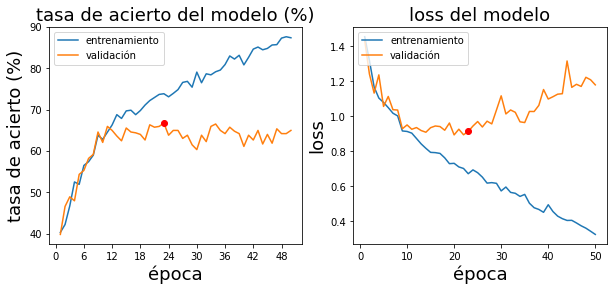

In [77]:
filepath='7canales_2paciente.h5'
checkpoint   = [EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001),
                ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode='min')]

acum_tr_acc = []
acum_val_acc = []
best_val_acc = -1000
acum_tr_loss  = []
acum_val_loss = []

epochs=50
batch_size=32


for e in range(epochs):
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=1,
                        callbacks=checkpoint,
                        verbose=1,
                        validation_data=(X_test, y_test))

    if history.history['val_accuracy'][-1] > best_val_acc:
        print("Validation accuracy improved from",
              best_val_acc, 'to', history.history['val_accuracy'])
        print("saving weights")
        best_val_acc = history.history['val_accuracy'][-1]

    acum_tr_acc.append(history.history['accuracy'][0])
    acum_val_acc.append(history.history['val_accuracy'][0])
    acum_tr_loss.append(history.history['loss'][0])
    acum_val_loss.append(history.history['val_loss'][0])

    if len(acum_tr_acc) > 1:
        clear_output()
        best_i = np.argmax(acum_val_acc)
        grafica_entrenamiento(acum_tr_acc, acum_val_acc, acum_tr_loss, acum_val_loss, best_i)

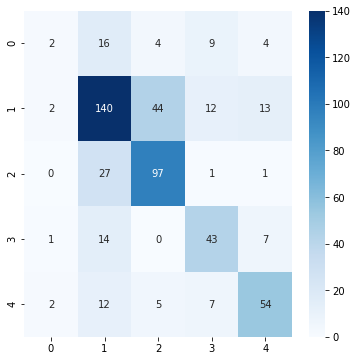

In [87]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred=np.argmax(model.predict(X_test),axis=1)
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues');

In [116]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

model=Sequential()
model.add(Conv1D(74,input_shape=(15360,7),kernel_size=256, strides=128, activation="relu",padding='same'))
model.add(MaxPooling1D(8))
model.add(Dropout(0.5))
model.add(Conv1D(74,input_shape=(15360,7),kernel_size=8, strides=1, activation="relu",padding='same'))
model.add(Conv1D(74,input_shape=(15360,7),kernel_size=8, strides=1, activation="relu",padding='same'))
model.add(MaxPooling1D(4))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(5,activation='softmax'))
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_84 (Conv1D)           (None, 120, 74)           132682    
_________________________________________________________________
max_pooling1d_41 (MaxPooling (None, 15, 74)            0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 15, 74)            0         
_________________________________________________________________
conv1d_85 (Conv1D)           (None, 15, 74)            43882     
_________________________________________________________________
conv1d_86 (Conv1D)           (None, 15, 74)            43882     
_________________________________________________________________
max_pooling1d_42 (MaxPooling (None, 3, 74)             0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 3, 74)           

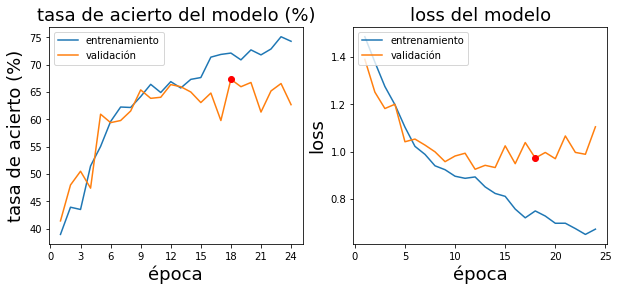

KeyboardInterrupt: 

In [117]:
filepath='7canales_2paciente.h5'
checkpoint   = [EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001),
                ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode='min')]

acum_tr_acc = []
acum_val_acc = []
best_val_acc = -1000
acum_tr_loss  = []
acum_val_loss = []

epochs=50
batch_size=16


for e in range(epochs):
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=1,
                        callbacks=checkpoint,
                        verbose=1,
                        validation_data=(X_test, y_test))

    if history.history['val_accuracy'][-1] > best_val_acc:
        print("Validation accuracy improved from",
              best_val_acc, 'to', history.history['val_accuracy'])
        print("saving weights")
        best_val_acc = history.history['val_accuracy'][-1]

    acum_tr_acc.append(history.history['accuracy'][0])
    acum_val_acc.append(history.history['val_accuracy'][0])
    acum_tr_loss.append(history.history['loss'][0])
    acum_val_loss.append(history.history['val_loss'][0])

    if len(acum_tr_acc) > 1:
        clear_output()
        best_i = np.argmax(acum_val_acc)
        grafica_entrenamiento(acum_tr_acc, acum_val_acc, acum_tr_loss, acum_val_loss, best_i)

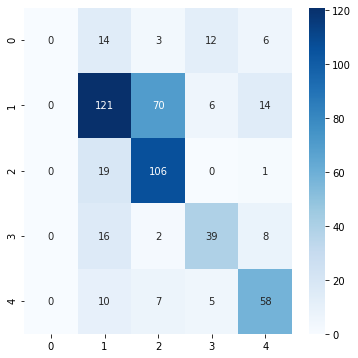

In [118]:
y_pred=np.argmax(model.predict(X_test),axis=1)
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues');

In [120]:
X_juntados=tensorflow.concat([X_psg1,X_psg2,X_psg3,X_psg4,X_psg5,X_psg6,X_psg7,X_psg8,X_psg9,X_psg11,X_psg12,X_psg13,X_psg14],axis=0).numpy()
# y_juntados=tensorflow.concat([y_psg2,y_psg2],axis=0).numpy()

In [121]:
X_juntados.shape

(10401, 15360, 7)

In [122]:
y_todos=np.concatenate([y_psg1,y_psg2,y_psg3,y_psg4,y_psg5,y_psg6,y_psg7,y_psg8,y_psg9,y_psg11,y_psg12,y_psg13,y_psg14])

In [123]:
X2=np.transpose(X_juntados,axes=(2,1,0))

In [124]:
X2_sc=np.array([(x-np.mean(x))/(np.std(x)) for x in X2])

In [125]:
from sklearn.preprocessing import Normalizer

norm=Normalizer()

X2_sc=np.transpose(np.array([(norm.fit_transform(x)) for x in X2]),axes=(2,1,0))

In [126]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y_todos_bin=le.fit_transform(y_todos)

In [127]:
from collections import Counter

Counter(y_todos_bin), Counter(y_todos)

(Counter({4: 1733, 0: 772, 1: 4479, 2: 2486, 3: 931}),
 Counter({'Sleep stage W': 1733,
          'Sleep stage N1': 772,
          'Sleep stage N2': 4479,
          'Sleep stage N3': 2486,
          'Sleep stage R': 931}))

In [128]:
X2_sc.shape

(10401, 15360, 7)

In [130]:
X_train,X_test,y_train,y_test=train_test_split(X2_sc,y_todos_bin,train_size=0.7,shuffle=True)

In [129]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling1D,BatchNormalization, UpSampling1D,Input,Dense,LSTM,MaxPooling1D, Dropout,Conv1D, concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
import seaborn as sns
import tensorflow
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

input1=Input(shape=(15360,7))
conv1=Conv1D(74, kernel_size=256, padding='same', strides=128, activation="relu")(input1)
max1=MaxPooling1D(8)(conv1)
drop1=Dropout(0.5)(max1)
conv2=Conv1D(74, kernel_size=8, padding='same', strides=1, activation="relu")(drop1)
conv3=Conv1D(74, kernel_size=8, padding='same', strides=1, activation="relu")(conv2)
conv4=Conv1D(74, kernel_size=8, padding='same', strides=1, activation="relu")(conv3)
max2=MaxPooling1D(4)(conv4)
drop2=Dropout(0.5)(max2)
lstm1=LSTM(74)(drop2)
dense1=Dense(5,'softmax')(lstm1)
model=Model(input1,dense1)
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model.summary()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4733874685322391473
]
Num GPUs Available:  0
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 15360, 7)]        0         
_________________________________________________________________
conv1d_87 (Conv1D)           (None, 120, 74)           132682    
_________________________________________________________________
max_pooling1d_43 (MaxPooling (None, 15, 74)            0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 15, 74)            0         
_________________________________________________________________
conv1d_88 (Conv1D)           (None, 15, 74)            43882     
_________________________________________________________________
conv1d_89 (Conv1D)           (None, 15, 74)          

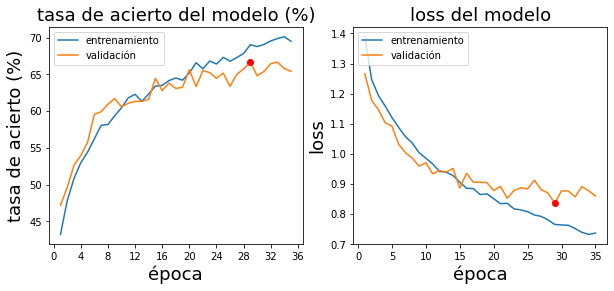

 82/228 [=========>....................] - ETA: 2s - loss: 0.7366 - accuracy: 0.6963

KeyboardInterrupt: 

In [131]:
filepath='7canales_2paciente.h5'
checkpoint   = [EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001),
                ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode='min')]

acum_tr_acc = []
acum_val_acc = []
best_val_acc = -1000
acum_tr_loss  = []
acum_val_loss = []

epochs=50
batch_size=32


for e in range(epochs):
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=1,
                        callbacks=checkpoint,
                        verbose=1,
                        validation_data=(X_test, y_test))

    if history.history['val_accuracy'][-1] > best_val_acc:
        print("Validation accuracy improved from",
              best_val_acc, 'to', history.history['val_accuracy'])
        print("saving weights")
        best_val_acc = history.history['val_accuracy'][-1]

    acum_tr_acc.append(history.history['accuracy'][0])
    acum_val_acc.append(history.history['val_accuracy'][0])
    acum_tr_loss.append(history.history['loss'][0])
    acum_val_loss.append(history.history['val_loss'][0])

    if len(acum_tr_acc) > 1:
        clear_output()
        best_i = np.argmax(acum_val_acc)
        grafica_entrenamiento(acum_tr_acc, acum_val_acc, acum_tr_loss, acum_val_loss, best_i)

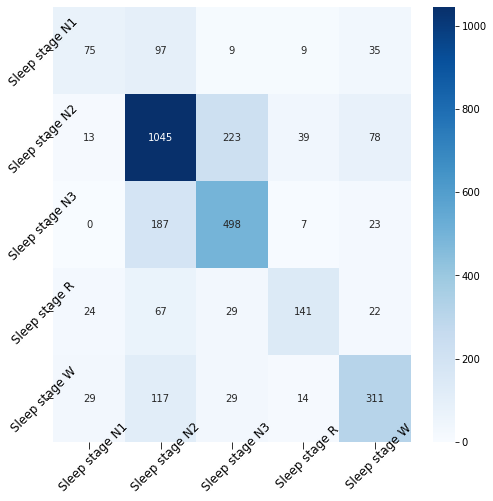

In [133]:
y_pred=np.argmax(model.predict(X_test),axis=1)

fig, ax = plt.subplots(figsize=(8,8))

cm=confusion_matrix(y_test,y_pred)
lista2=['Sleep stage N1','Sleep stage N2','Sleep stage N3','Sleep stage R','Sleep stage W']
sns.heatmap(pd.DataFrame(cm,index=['Sleep stage N1','Sleep stage N2','Sleep stage N3','Sleep stage R','Sleep stage W'],columns=['Sleep stage N1','Sleep stage N2','Sleep stage N3','Sleep stage R','Sleep stage W']),annot=True,fmt='d',cmap='Blues', ax=ax)

params = dict(rotation=45, ha='center', rotation_mode='anchor')
plt.setp(ax.get_yticklabels(), **params)
plt.setp(ax.get_xticklabels(), **params)
ax.tick_params(size=7)
ax.set_xticklabels(lista2,fontsize=12)
ax.set_yticklabels(lista2,fontsize=12);

In [134]:
print(classification_report(y_test,y_pred,target_names=lista2))

                precision    recall  f1-score   support

Sleep stage N1       0.53      0.33      0.41       225
Sleep stage N2       0.69      0.75      0.72      1398
Sleep stage N3       0.63      0.70      0.66       715
 Sleep stage R       0.67      0.50      0.57       283
 Sleep stage W       0.66      0.62      0.64       500

      accuracy                           0.66      3121
     macro avg       0.64      0.58      0.60      3121
  weighted avg       0.66      0.66      0.66      3121



In [36]:
def canal (file):

    data = mne.io.read_raw_edf(f'{file}.edf')
    raw_data = data.get_data()
    events, events_id = mne.events_from_annotations(data)
    tmax = 30. - 1. / data.info['sfreq']  # tmax in included

    epochs_train = mne.Epochs(raw=data, events=events,
                              event_id=events_id, tmin=0., tmax=tmax, baseline=None, event_repeated='merge')
    patatuela = epochs_train.load_data()
    id_to_class_dict = {value:key for key, value in patatuela.event_id.items()}

    objective_stages = ['Sleep stage N1','Sleep stage N2','Sleep stage N3','Sleep stage R','Sleep stage W']
    epochs_to_df = [a for a in patatuela]
    epochs_to_df = []
    label_to_df = []
    for epoch, label in zip(patatuela, patatuela.events[:,-1]):
        # print(label)
        label = id_to_class_dict[label]
        if label in objective_stages:
            # print("True")
            epochs_to_df.append(epoch)
            label_to_df.append(label)
    dict_to_df = {"Epoch":epochs_to_df,"Label":label_to_df}
    df1=pd.DataFrame(dict_to_df)
    valores=df1.Epoch.values
    channels = data.ch_names
    diccionarios=[dict(zip(channels, sublist)) for sublist in valores]
    c3=[d['C3'] for d in diccionarios]
    matriz=np.array([c3])
    matriz=matriz.reshape(matriz.shape[0]*matriz.shape[1],matriz.shape[2])
    return matriz, df1.Label

In [27]:
psg1,lab1=canal('PSG1')

Extracting EDF parameters from /home/pabloro/master/PSG1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-23-df4c4311cbe9>:3: RuntimeWarning: Omitted 3 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-23-df4c4311cbe9>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PR, Ref', 'Obstructive Apnea', 'Oximeter Event', 'Oxygen Desaturation', 'Pulse Rate Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
3031 matching events found
No baseline correction applied
0 projection items activated
Loading data for 3031 events and 15360 original time points ...
1 bad epochs dropped


In [37]:
filess=[f'PSG{i}' for i in range(1,15)]

Extracting EDF parameters from /home/pabloro/master/PSG1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Omitted 3 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PR, Ref', 'Obstructive Apnea', 'Oximeter Event', 'Oxygen Desaturation', 'Pulse Rate Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
3031 matching events found
No baseline correction applied
0 projection items activated
Loading data for 3031 events and 15360 original time points ...
1 bad epochs dropped


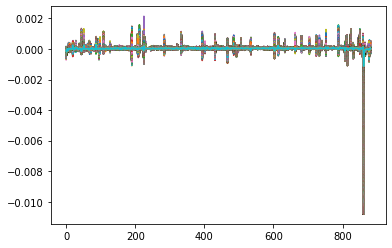

Extracting EDF parameters from /home/pabloro/master/PSG2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Omitted 6 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Central Apnea', 'Central Hypopnea', 'EEG arousal', 'ENTRO A COLOCAR PULSIOXIMETRO', 'ENTRO PARA ARREGLAR CHIN', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Mixed Apnea', 'Mixed Hypopnea', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oximeter Event', 'Oxygen Desaturation', 'Pulse Rate Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage ?', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - ECG', 'Started Analyzer - Sleep Events', 'Tachycardia', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1287 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1287

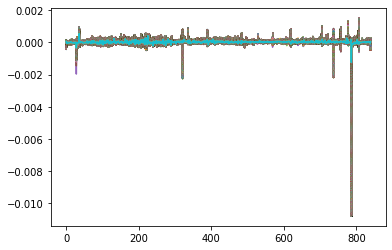

Extracting EDF parameters from /home/pabloro/master/PSG3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Omitted 2 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Bradycardia', 'Central Apnea', 'EEG arousal', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Lights On', 'Limb Movement', 'Mixed Apnea', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oximeter Event', 'Oxygen Desaturation', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'Stopped Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1724 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1724 events and 15360 original time points ...
3 bad epochs dropped


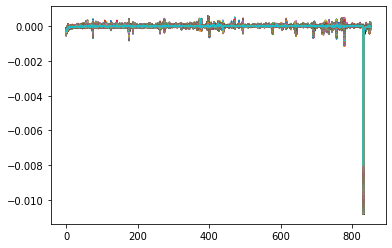

Extracting EDF parameters from /home/pabloro/master/PSG4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Omitted 39 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Gain/Filter Change', 'Headbox Disconnecting', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PR, Ref', 'NO ENTRO POR EKG', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Pulse Rate Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON', 'Video System Error']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1990 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1990 events and 15360 original time points ...
1 bad epochs dropped


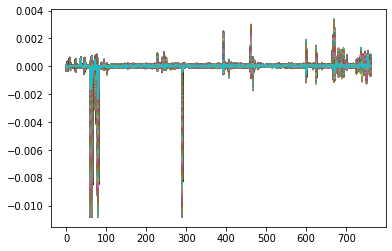

Extracting EDF parameters from /home/pabloro/master/PSG5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Omitted 143 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Central Apnea', 'EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PSG CO2, Ref', 'ORINANDO', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1525 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1525 events and 15360 original time points ...
1 bad epochs dropped


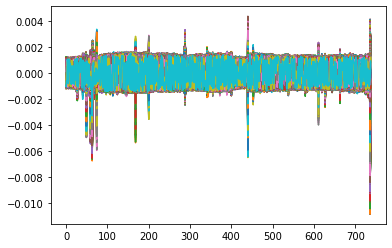

Extracting EDF parameters from /home/pabloro/master/PSG6.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Omitted 234 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Limited 3 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Central Apnea', 'EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Mixed Apnea', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Tachycardia', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
2767 matching events found
No baseline correction applied
0 projection items activated
Loading data for 2767 events and 15360 original time points ...
6 bad epochs dropped


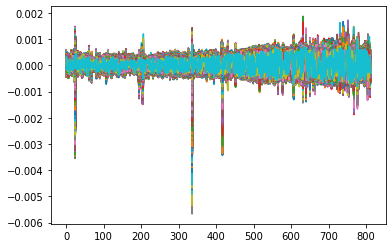

Extracting EDF parameters from /home/pabloro/master/PSG7.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Omitted 113 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Bradycardia', 'EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
2698 matching events found
No baseline correction applied
0 projection items activated
Loading data for 2698 events and 15360 original time points ...
7 bad epochs dropped


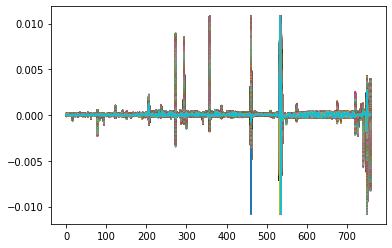

Extracting EDF parameters from /home/pabloro/master/PSG8.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Omitted 4 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Bradycardia', 'CAMBIO A2', 'Central Apnea', 'Central Hypopnea', 'EEG arousal', 'ENTRO A REVISAR FLOW', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Mixed Apnea', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'REVISOMA2', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'TIENE FRIO LE PONGO UNA MANTA', 'Tachycardia']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1005 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1005 events and 15360 original time points ...
1 

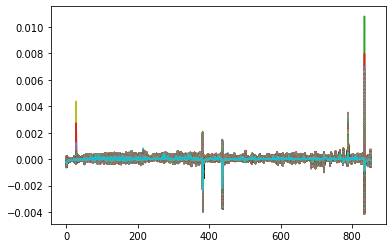

Extracting EDF parameters from /home/pabloro/master/PSG9.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Omitted 99 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PSG CO2, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Tachycardia', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1429 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1429 events and 15360 original time points ...
1 bad epochs dropped


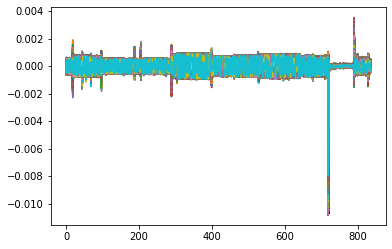

Extracting EDF parameters from /home/pabloro/master/PSG10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Omitted 109 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Central Apnea', 'EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PSG CO2, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage W', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1295 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1295 events and 15360 original time points ...
0 bad epochs dropped


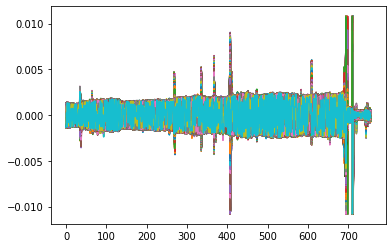

Extracting EDF parameters from /home/pabloro/master/PSG11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Omitted 92 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Bradycardia', 'Central Apnea', 'EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Tachycardia', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
3903 matching events found
No baseline correction applied
0 projection items activated
Loading data for 3903 events and 15360 original time points ...
2 bad epochs dropped


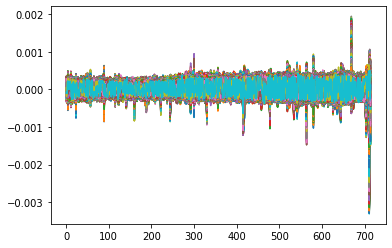

Extracting EDF parameters from /home/pabloro/master/PSG12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Omitted 120 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PSG CO2, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Tachycardia', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1143 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1143 events and 15360 original time points ...
1 bad epochs dropped


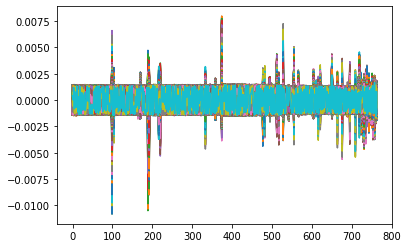

Extracting EDF parameters from /home/pabloro/master/PSG13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Omitted 2 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['AHORA QUE ESTA MÃ\x81S TRANQUILO Y FINALIZANDO ', 'Bradycardia', 'CON LOS MOVIMIENTOS SE HABIA DOBLADO CANULA', 'CUANDO SE DESPIERTE REVISARE CHIN', 'CUANDO SE MUEVA REVISO BANDA ABD.', 'Central Apnea', 'EEG arousal', 'EKG CORRECTO', 'ENTRO A REVISAR FLOW', 'ESTA TODO DOBLADO A LA PART IZQ. POR ESO MALA SEÃ\x91AL EKG', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Lights On', 'Limb Movement', 'Montage:PR, Ref', 'NO VOY A ENTRAR POR ekg', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'REVISO MONTAJE', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'SE MUEVE MUCHO ESTA TODO SUDADO', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events']
Not setting metadata
Multiple event values for single event ti

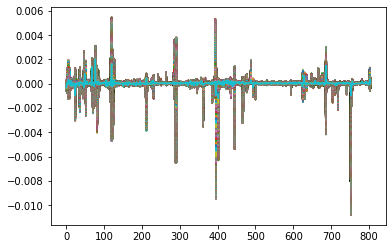

Extracting EDF parameters from /home/pabloro/master/PSG14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Omitted 104 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-36-235abccdd63e>:3: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PSG CO2, Ref', 'Obstructive Apnea', 'Oxygen Desaturation', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
2003 matching events found
No baseline correction applied
0 projection items activated
Loading data for 2003 events and 15360 original time points ...
4 bad epochs dropped


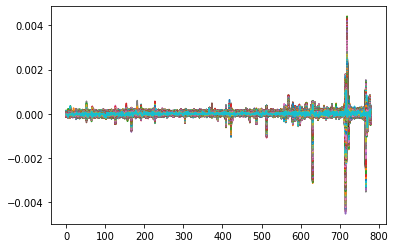

In [38]:
for fil in filess:
    mat,lab=canal(fil)
    plt.plot(mat)
    plt.show()

In [35]:
psg1.shape

(882, 15360)

In [31]:
psg1=psg1.reshape(882,15360)

In [3]:
for fil in filess:
    print(datos(fil))

Extracting EDF parameters from /home/pabloro/master/PSG1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 3 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PR, Ref', 'Obstructive Apnea', 'Oximeter Event', 'Oxygen Desaturation', 'Pulse Rate Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
3031 matching events found
No baseline correction applied
0 projection items activated
Loading data for 3031 events and 15360 original time points ...
1 bad epochs dropped
(array([[[-4.17761501e-04, -3.59423209e-04, -3.22508583e-04, ...,
          6.93797208e-05, -4.46601053e-05,  2.71915770e-05],
        [-4.17761501e-

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 6 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Central Apnea', 'Central Hypopnea', 'EEG arousal', 'ENTRO A COLOCAR PULSIOXIMETRO', 'ENTRO PARA ARREGLAR CHIN', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Mixed Apnea', 'Mixed Hypopnea', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oximeter Event', 'Oxygen Desaturation', 'Pulse Rate Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage ?', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - ECG', 'Started Analyzer - Sleep Events', 'Tachycardia', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1287 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1287

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 2 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Bradycardia', 'Central Apnea', 'EEG arousal', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Lights On', 'Limb Movement', 'Mixed Apnea', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oximeter Event', 'Oxygen Desaturation', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'Stopped Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1724 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1724 events and 15360 original time points ...
3 bad epochs dropped
(array([[[-3.87109178e-04, -3.79858091e-04, -3.867

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 39 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Gain/Filter Change', 'Headbox Disconnecting', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PR, Ref', 'NO ENTRO POR EKG', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Pulse Rate Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON', 'Video System Error']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1990 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1990 events and 15360 original time points ...
1 bad epochs dropped
(array([[[-1.27718013e-04, -8.78370336e-05, -1.19148547e-04, ...,
         

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 143 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Central Apnea', 'EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PSG CO2, Ref', 'ORINANDO', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1525 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1525 events and 15360 original time points ...
1 bad epochs dropped
(array([[[ 9.21382467e-04,  6.674296

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 234 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 3 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Central Apnea', 'EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Mixed Apnea', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Tachycardia', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
2767 matching events found
No baseline correction applied
0 projection items activated
Loading data for 2767 events and 15360 original time points ...
6 bad epochs dropped
(array([[[ 1.13875029e-

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 113 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Bradycardia', 'EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
2698 matching events found
No baseline correction applied
0 projection items activated
Loading data for 2698 events and 15360 original time points ...
7 bad epochs dropped
(array([[[ 9.37697414e-05,  5.48775463e-05,  9.17921721e-05, ...,
          1.17170977e-04,  6.04806592e-05, 

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 4 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Bradycardia', 'CAMBIO A2', 'Central Apnea', 'Central Hypopnea', 'EEG arousal', 'ENTRO A REVISAR FLOW', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Mixed Apnea', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'REVISOMA2', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'TIENE FRIO LE PONGO UNA MANTA', 'Tachycardia']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1005 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1005 events and 15360 original time points ...
1 

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 99 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PSG CO2, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Tachycardia', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1429 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1429 events and 15360 original time points ...
1 bad epochs dropped
(array([[[-1.68587778e-04,  2.80155642e-06,  2.883

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 109 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Central Apnea', 'EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PSG CO2, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage W', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1295 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1295 events and 15360 original time points ...
0 bad epochs dropped
(array([[[ 8.90400549e-04,  1.94296178e-04,  4.43305104e-05, ...,
          2.42252232e-05, -

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 92 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Bradycardia', 'Central Apnea', 'EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Tachycardia', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
3903 matching events found
No baseline correction applied
0 projection items activated
Loading data for 3903 events and 15360 original time points ...
2 bad epochs dropped
(array([[[-1.99240101e-

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 120 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PSG CO2, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Tachycardia', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1143 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1143 events and 15360 original time points ...
1 bad epochs dropped
(array([[[ 5.92776379e-04,  4.24353399e-04,  7.95971618e-05, ...,
 

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 2 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['AHORA QUE ESTA MÃ\x81S TRANQUILO Y FINALIZANDO ', 'Bradycardia', 'CON LOS MOVIMIENTOS SE HABIA DOBLADO CANULA', 'CUANDO SE DESPIERTE REVISARE CHIN', 'CUANDO SE MUEVA REVISO BANDA ABD.', 'Central Apnea', 'EEG arousal', 'EKG CORRECTO', 'ENTRO A REVISAR FLOW', 'ESTA TODO DOBLADO A LA PART IZQ. POR ESO MALA SEÃ\x91AL EKG', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Lights On', 'Limb Movement', 'Montage:PR, Ref', 'NO VOY A ENTRAR POR ekg', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'REVISO MONTAJE', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'SE MUEVE MUCHO ESTA TODO SUDADO', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events']
Not setting metadata
Multiple event values for single event ti

<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Omitted 104 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-1-fd63210202f8>:9: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PSG CO2, Ref', 'Obstructive Apnea', 'Oxygen Desaturation', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
2003 matching events found
No baseline correction applied
0 projection items activated
Loading data for 2003 events and 15360 original time points ...
4 bad epochs dropped
(array([[[-7.82787823e-05, -4.26825360e-05, -1.69741360e-05, ...,
          4.89448386e-05, -1.17830167e-0

In [22]:
for x in X_train1:
    print(x.shape)

(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)
(15360, 7)

In [4]:
X_train1=np.load('datos_PSG1.npy')

In [19]:
for x in X_train1:
    df=pd.DataFrame(x)
    print(len(len(df)))
#     df.plot()
#     plt.show()
#     plt.plot(x)
#     plt.show()

TypeError: object of type 'int' has no len()